<a href="https://colab.research.google.com/github/comasya/Proyecto_Data_III/blob/main/Proyecto_Final_DataIII_Comas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO FINAL DATA SCIENCE III

Análisis de Sentimientos de Críticas de Películas en Español

Críticas Filmaffinity Netflix Español (+10000)
https://www.kaggle.com/datasets/andrsmosquera/crticas-pelculas-filmaffinity-en-espaol-netflix?utm_source=chatgpt.com&select=film_reviews_result.csv

### Acerca del conjunto de datos

El Procesamiento del Lenguaje Natural es una de las áreas de la inteligencia artificial muy estudiada hoy en día que tiene entre otros objetivos el entendimiento del lenguaje natural. El PNL está avanzando cada día más pero se centra mucho en la lengua inglesa. Con este conjunto de datos se pretende aportar a la comunidad un pequeño corpus en español con críticas de películas obtenidas de la web de www.filmaffinity.com

### Contenido

Este conjunto de datos contiene críticas realizadas por los usuarios de www.filmaffinity.com sobre todas las películas y series españolas (Más de 1000 películas).

El conjunto de datos está formado por:

film_name: Título de la película.
género: Género de la película (comedia, terror, acción, etc.)
film_avg_rate: Nota media de la película (votos de todos los usuarios)
review_rate: Nota que el usuario que hace la crítica pone a la película.
review_title: Título de la crítica.
review_text: Crítica de la película.

##Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
import string
import spacy
from spacy.lang.es.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Carga y exploración inicial

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA III/film_reviews_result.csv", delimiter='|')
print("Dimensiones del dataset:")
print(df.shape)

print("\nPrimeras filas del dataset:")
print(df.head())

print("\nInformación sobre el dataset:")
print(df.info())

print("\nEstadísticas descriptivas del dataset:")
print(df.describe().round(2))

Dimensiones del dataset:
(10058, 6)

Primeras filas del dataset:
               film_name                        gender film_avg_rate  \
0  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
1  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
2  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
3  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
4  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   

   review_rate                         review_title  \
0            1                              Respira   
1            2  Esta serie te llama tonto a la cara   
2            1                              Respira   
3            1             Imposible, no hay manera   
4            1                        Serie nefasta   

                                         review_text  
0  Como fan de las series españolas y de Najwa, e...  
1  Todo lo malo que puede tener una serie lo pose...  
2  La 

En la exploración inicial, se puede observar que el conjunto de datos contiene 6 columnas y 10058 filas.

Por otro lado, en la información sobre el dataset se visualiza que no presenta valores nulos y review_rate esta clasificada como tipo "Object", corresponde realizar el cambio a numérico para realizar análisis cuantitativo.

Asimismo, en la estadistica descriptiva, el rango de review_rate van del 1 a 10, teniendo una media de 5,85.

In [ ]:
df['gender'].value_counts()

,count
gender,
"Serie de TV, Thriller, Intriga, Acción, Robos & Atracos, Secuestros / Desapariciones",339
"Comedia, Drama, Ciencia ficción, Sátira, Catástrofes, Fin del mundo, Cambio climático",320
"Drama, Aventuras, Basado en hechos reales, Supervivencia, Naturaleza, Años 70, Zonas frías/polares, Escenario único",271
"Thriller, Drama, Vida rural",246
"Western, Drama, Drama psicológico, Homosexualidad, Años 20",196
...,...
"Drama, Biográfico, Crimen, Siglo XIX",1
"Romance, Comedia, Comedia romántica, Música",1
"Serie de TV, Comedia, Policíaco",1


Se listan 701 filas de combinaciones de géneros únicas con sus respectivas frecuencias, lo que se observa es la diversidad y la popularidad de los géneros representados en el conjunto de datos.

In [ ]:
df['review_text'].value_counts()

,count
review_text,
"Tercera entrega de ""Pesadillas y ensoñaciones"": una escritora semi famosa, al escribir, logra entrar en un estado de trance que le permite acceder a ""otras realidades"".Tomando como base las leyendas sobre la ""escritura automática"" (básicamente cuando los escritores ingresan a un estado alterado de conciencia por medio de factores sobrenaturales), Poema y dolor utiliza este recurso para que la escritora protagonista de cuenta de un pasado que le han ocultado.La premisa/idea general sobre la que descansa el episodio está bien planteada. A medida que se va desarrollando la historia, se van agregando cerca de su desenlace elementos extras que empantanan su ejecución, volviendo el capítulo enrevesado de vueltas de tuerca (spoiler).Vale destacar el uso de las cámaras y de la iluminación como influencia directa de los videojuegos en primera persona de ""survival horror"". Algo que se encuentra presente en varios capítulos más de la serie y que parece ser una tendencia en alza dentro de la nueva industria cinematográfica. El problema aquí es que los golpes parecen ""punchs"" gráficos y el despliegue de los personajes cuando la escritora entra en trance peca de ser demasiado infantiloide para los temas delicados que toca la historia. El resultado es una mezcla imprecisa que busca captar un target de público que no necesariamente compatibiliza en gustos.Poema y dolor se mantiene en la tónica de presentar historias fantásticas que siempre prometen, pero bajo una ejecución simplona y torpe.",1
"Como fan de las series españolas y de Najwa, esto duele, la serie es muy mala.Manu Ríos da para lo que da, enseñar cacho, Najwa hace de mala, papel repetido que no aporta ninguna capa nueva.Telenovela de mediodía con un guión mediocre y diálogos planos.En aspectos técnicos como fotografía, sonido, también deja que desear.Lo peor de Carlos Montero, de largo.",1
"Todo lo malo que puede tener una serie lo posee ""Respira"". Los diálogos son penosos, los personajes son puras caricaturas, las tramas se ven venir de lejos y los actores... Pues las tres caras de siempre, ninguna de las cuales sabe vocalizar, y luego las cuotas que tocan y para casa. Aitana, maja, ¿Qué haces metida aquí?En estos días también estoy viendo la segunda temporada de ""La edad dorada"" y no es por comparar, pero voy a hacerlo. Esa también es una serie ligera que no viene a salvar el mundo, pero es que no hay ápice posible de similitud. En ningún sentido. Aquí no hay nada cuidado. Es pura basura cuyos implicados, todos sin excepción, saben positivamente que lo es.Y yo, que suelo tener el estómago hecho a todo, me he sentido ofendido viendo ""Respira"". Me he sentido insultado. Tonto de baba.",1
"La serie es un drama médico que intenta ""copiar"" los estilemas yankies adaptándolos al modo español.La historia de base transcurre en un hospital valenciano representado de manera inverosímil pues el ambiente de hospital representado en la serie dista mucho de la realidad hospitalaria tanto valenciana como española.El guión entremezcla dramas médicos mal plateados, con dramas cotidianos pueriles y riículos.Los diálogos dan pena, los personajes son de estereotipo.Típica serie de Netflix distribuidora que suele llenar su grilla con este tipo de bazofias.",1
"Nadie te obliga a ver nada que no quieras ver y, si no hay dinero público involucrado, tampoco puedes quejarte de lo mala que es una producción audiovisual, así que la única salida que tienes es dejar de verla y no recomendarla ni a tu peor enemigo. Una vez más una producción española me saca de su visionado y me obliga a la crítica negativa. Respira no da opción y resulta ofensiva como tantas otras que consiguen producirse y estrenarse en plataformas y canales de televisión. Falta talento en todo en este caso concreto. Desde el equipo técnico hasta el artístico resultan mediocres y quizá sea culpa de unos guiones planos como la dirección y las interpretaciones.Las historias carecen de credibilidad y los diá

La información sugiere que el conjunto de datos contiene una gran diversidad de opiniones, con 10058 reseñas únicas.

##Procesamiento y limpieza de datos

Se reemplaza coma por punto en 'film_avg_rate' y el tipo de dato a float

In [ ]:
df['film_avg_rate'] = df['film_avg_rate'].str.replace(',', '.').astype(float)

Eliminación de duplicados en caso que haya

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Verificar nulos

In [ ]:
df.isnull().sum()

,0
film_name,0
gender,0
film_avg_rate,0
review_rate,0
review_title,0
review_text,0


##Visualizaciones básicas

Distribución de puntuaciones de los usuarios

/tmp/ipython-input-8-4290508353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='review_rate', palette='coolwarm')


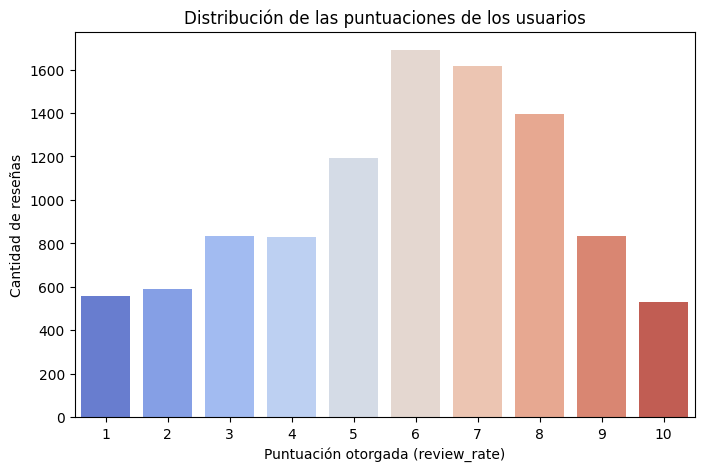

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='review_rate', palette='coolwarm')
plt.title('Distribución de las puntuaciones de los usuarios')
plt.xlabel('Puntuación otorgada (review_rate)')
plt.ylabel('Cantidad de reseñas')
plt.show()

Se observa que las puntuaciones más frecuentes se concentran en los valores intermedios, especialmente entre 6 y 7, lo que indica una tendencia general hacia evaluaciones moderadamente positivas.

/tmp/ipython-input-9-1255417144.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, y='Género', x='Cantidad', palette='magma')


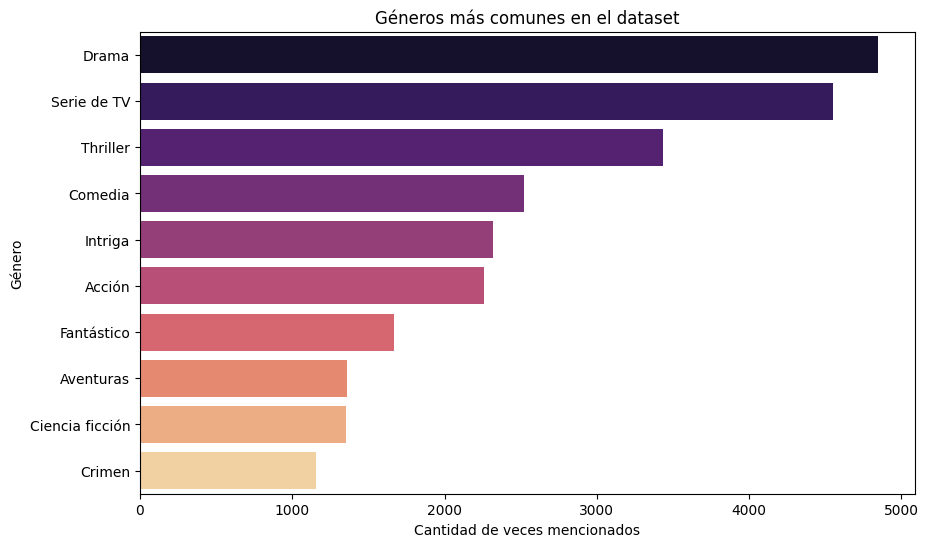

In [ ]:
all_genres = df['gender'].dropna().str.split(', ').sum()
genre_counts = Counter(all_genres)

top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Género', 'Cantidad'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, y='Género', x='Cantidad', palette='magma')
plt.title('Géneros más comunes en el dataset')
plt.xlabel('Cantidad de veces mencionados')
plt.ylabel('Género')
plt.show()

Boxplot de puntuaciones de los usuarios por película mas comentada

En el grafico de barra vertical se pueden observar los géneros más mencionados en las críticas del dataset. El género más frecuente es Drama, seguido por Serie de TV y Thriller.

/tmp/ipython-input-10-3554782915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='film_name', y='review_rate', palette='viridis')


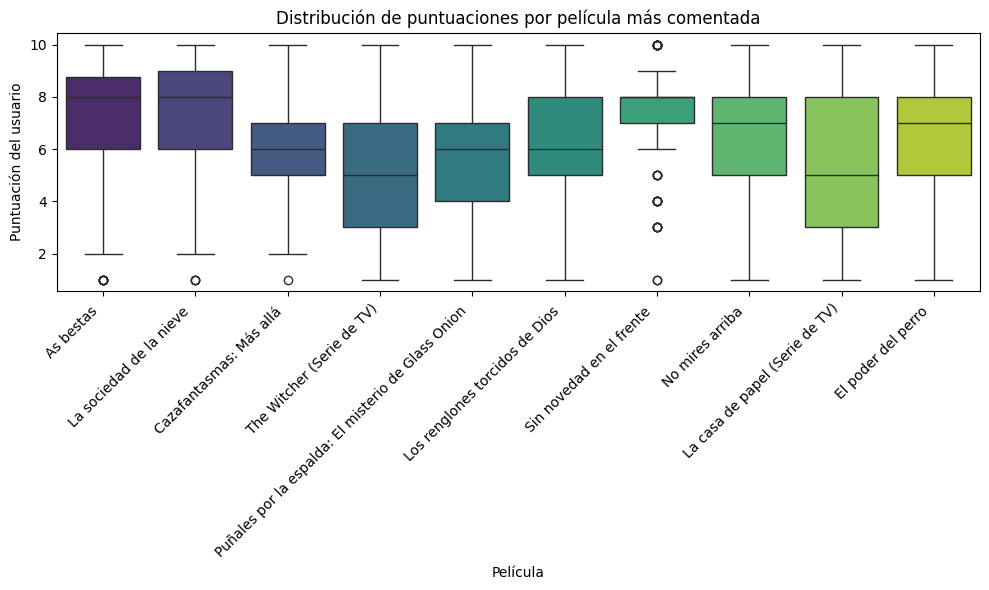

In [ ]:
top_films = df['film_name'].value_counts().head(10).index
df_top = df[df['film_name'].isin(top_films)]
plt.figure(figsize=(10,6))
sns.boxplot(data=df_top, x='film_name', y='review_rate', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de puntuaciones por película más comentada')
plt.xlabel('Película')
plt.ylabel('Puntuación del usuario')
plt.tight_layout()
plt.show()

El boxplot compara la distribución de las puntuaciones de usuarios entre las películas más comentadas del dataset.

Se puede observar que títulos como As bestas, La sociedad de la nieve y Cazafantasmas: Más allá presentan medianas altas y concentraciones de valoraciones positivas, mientras que otros como La casa de papel o The Witcher tienen distribuciones más dispersas y medianas más bajas, lo que refleja opiniones más divididas.

##Procesamiento NLP

Se crea una columba de reseñas combinadas

In [ ]:
df['review'] = df['review_title'] + ". " + df['review_text']

Función de limpieza

In [ ]:
stop_words = set(stopwords.words('spanish'))
stopwords_extra = [
    "netflix", "serie", "película", "personaje", "historia", "capítulo", "escena", "temporada",
    "film", "peli", "cine", "año", "ver", "hacer", "hecho", "vez", "momento", "aquí", "aún", "año",
    "si", "así", "puede", "pues", "aunque", "solo", "toda", "todo", "gran", "cada", "casi", "mismo",
    "misma", "pueden", "parte", "final", "forma", "solo", "mismo", "quizá", "cosa", "vida", "aun",
    "personajes",'Serie','netflix'
]

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\d+', '', texto)
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return ' '.join(palabras)

df['review_clean'] = df['review_text'].apply(limpiar_texto)

Ejemplo de Stopwords

In [ ]:
df[['review_text', 'review_clean']].sample(5)

,review_text,review_clean
5319,"No es una serie impresionante, pero no entiend...",serie impresionante entiendo nota media filmaf...
3182,Habitualmente me gustan las películas de Finch...,habitualmente gustan películas fincher parece ...
9597,*Amplitud de campoMás dura será la caída (The ...,amplitud campomás dura caída the harder they f...
5257,"Una buena historia y un buen guion, muy buena ...",buena historia buen guion buena música interpr...
8129,"Don't look up es un retrato cruel y, por desgr...",dont look up retrato cruel desgracia realista ...


Clasificación de sentimiento según puntuación

In [ ]:
def clasificar_sentimiento(valor):
    if valor <= 5:
        return 'negativo'
    elif valor > 5:
        return 'positivo'

df['sentimiento'] = df['review_rate'].apply(clasificar_sentimiento)
print(df['sentimiento'].value_counts())

sentimiento
positivo    6057
negativo    4001
Name: count, dtype: int64


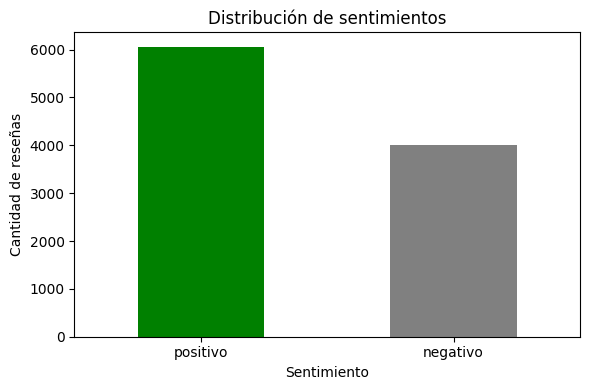

In [ ]:
sentimientos = df['sentimiento'].value_counts()
plt.figure(figsize=(6,4))
sentimientos.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribución de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de reseñas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El análisis de sentimientos revela que la mayoría de las críticas del dataset son positivas, con un total de 6057 reseñas positivas, frente a 4001 reseñas negativas.

Distribución de sentimiento (polaridad)

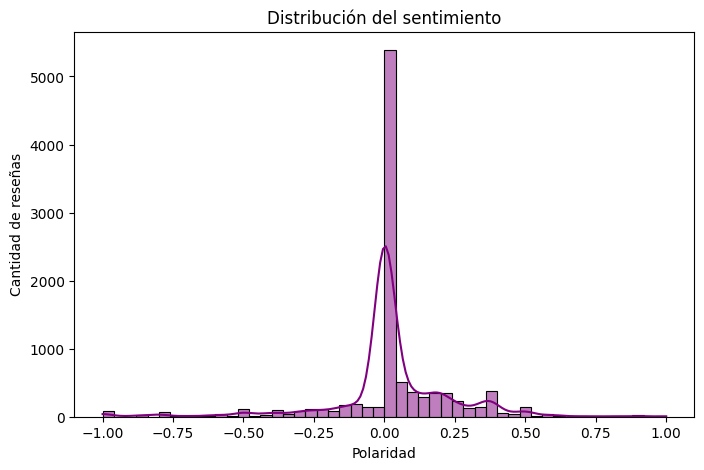

In [ ]:
df['sentimiento'] = df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.histplot(df['sentimiento'], bins=50, kde=True, color='purple')
plt.title('Distribución del sentimiento')
plt.xlabel('Polaridad')
plt.ylabel('Cantidad de reseñas')
plt.show()

La mayoría de las reseñas se concentran en torno al valor cero, lo que indica una alta proporción de opiniones neutras o moderadas. Se observa una ligera inclinación hacia valores positivos.

In [ ]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 65.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
spacy.prefer_gpu()

# Aumentar el límite a 10 millones de caracteres
from spacy.lang.es import Spanish
nlp = Spanish()
nlp.max_length = 10_000_000
nlp = spacy.load("es_core_news_sm")

In [ ]:
def procesar_textos_por_bloques(lista_textos, nlp):
    procesado = []
    for texto in lista_textos:
        doc = nlp(texto.lower())
        adjetivos = [token.lemma_ for token in doc if token.pos_ == 'ADJ' and not token.is_stop]
        procesado.extend(adjetivos)
    return " ".join(procesado)

positivas_lista = df[df['review_rate'] > 5]['review_text'].dropna().tolist()
negativas_lista = df[df['review_rate'] <= 5]['review_text'].dropna().tolist()

# Cargar modelo con límite ajustado si es necesario
nlp = spacy.load("es_core_news_sm")
nlp.max_length = 2_000_000

# Procesar en partes
positivas_proc = procesar_textos_por_bloques(positivas_lista, nlp)
negativas_proc = procesar_textos_por_bloques(negativas_lista, nlp)

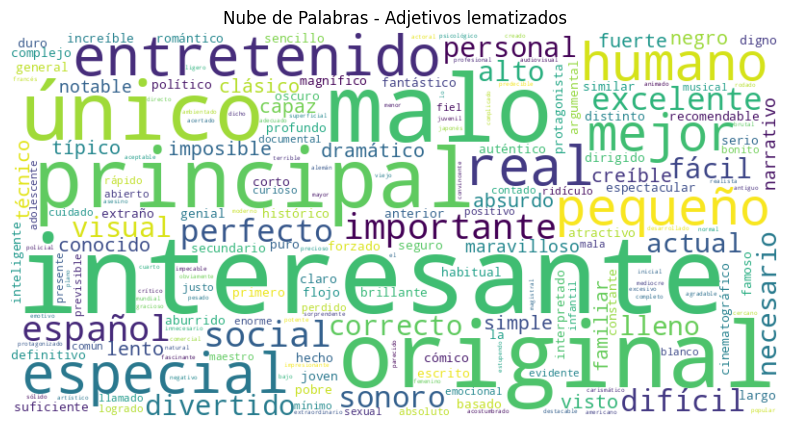

In [ ]:
texto = positivas_proc + ' ' + negativas_proc

# Crear y mostrar la nube
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Adjetivos lematizados')
plt.show()

In [ ]:
Texto = ' '.join(df['review_clean']).split()
conteo = Counter(palabras)
print(conteo.most_common(20))


[('película', 10682), ('serie', 10550), ('si', 7628), ('historia', 6836), ('bien', 6594), ('personajes', 5640), ('ser', 5569), ('ver', 4642), ('hace', 4241), ('tan', 3962), ('aunque', 3674), ('mejor', 3509), ('puede', 3145), ('gran', 3094), ('parece', 3052), ('menos', 2986), ('dos', 2984), ('vez', 2911), ('parte', 2884), ('solo', 2761)]


In [ ]:
def clasificar_sentimiento(valor):
    if valor <= 5:
        return 'negativo'
    elif valor > 5:
        return 'positivo'


df['sentimiento'] = df['review_rate'].apply(clasificar_sentimiento)
df['sentimiento'].value_counts()

,count
sentimiento,
positivo,6057
negativo,4001


In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['review_clean'])
y = df['sentimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    negativo       0.77      0.64      0.70       800
    positivo       0.79      0.88      0.83      1212

    accuracy                           0.78      2012
   macro avg       0.78      0.76      0.76      2012
weighted avg       0.78      0.78      0.78      2012



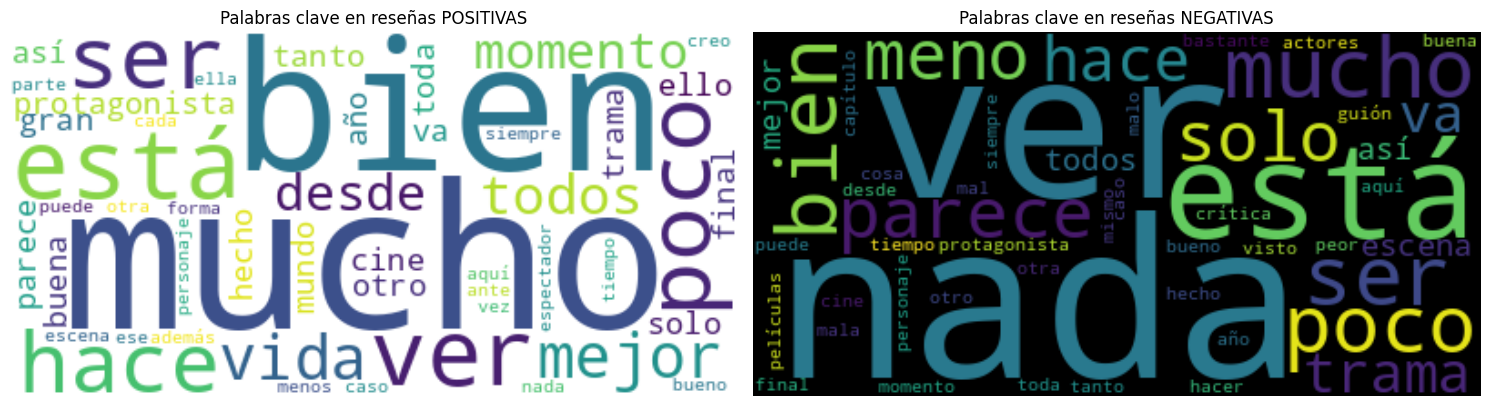

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Lista personalizada de stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update([
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'se', 'del', 'las', 'por', 'un', 'para',
    'con', 'no', 'una', 'su', 'al', 'es', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o',
    'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me',
    'hasta', 'hay', 'donde', 'han', 'quien', 'uno', 'ni', 'todo', 'fue', 'ha', 'pues','tiene',
    'esa', 'eso', 'son', 'sea', 'algo', 'nos','tan','qué','esto','yo','si','mi','Netflix',
    'película', 'historia', 'aunque', 'personajes','serie', 'te'
])

# Dividir reseñas por puntuación
positivas = " ".join(df[df['review_rate'] >= 7]['review_text'].dropna().tolist())
negativas = " ".join(df[df['review_rate'] <= 3]['review_text'].dropna().tolist())

# Graficar nubes de palabras sin conectores
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(WordCloud(stopwords=stopwords_es, background_color='white', max_words=50).generate(positivas), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Palabras clave en reseñas POSITIVAS')

axes[1].imshow(WordCloud(stopwords=stopwords_es, background_color='black', max_words=50).generate(negativas), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Palabras clave en reseñas NEGATIVAS')

plt.tight_layout()
plt.show()

## Nube de palabras con adjetivos lematizados


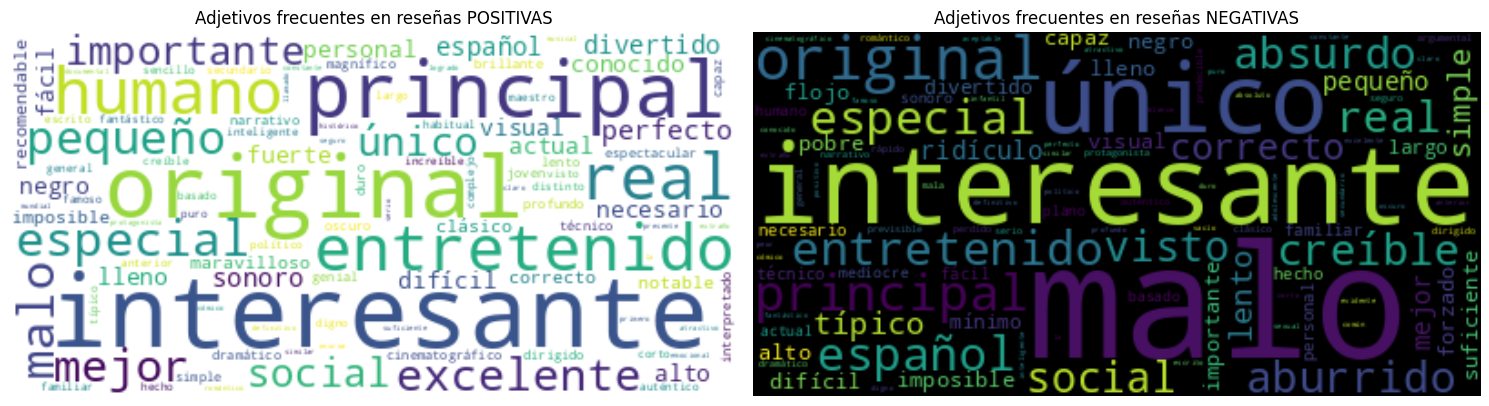

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(WordCloud(background_color='white', max_words=100).generate(positivas_proc), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Adjetivos frecuentes en reseñas POSITIVAS')

axes[1].imshow(WordCloud(background_color='black', max_words=100).generate(negativas_proc), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Adjetivos frecuentes en reseñas NEGATIVAS')

plt.tight_layout()
plt.show()

##Redes neuronales

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convertir etiquetas 'positivo' y 'negativo' a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # negativo = 0, positivo = 1

# Dividir en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convertir a arrays (por compatibilidad con Keras)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))  # 2 clases: positivo y negativo

# Compilar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train.toarray(), y_train_cat,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6065 - loss: 0.6567 - val_accuracy: 0.6907 - val_loss: 0.5805
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7683 - loss: 0.5272 - val_accuracy: 0.7820 - val_loss: 0.4839
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8351 - loss: 0.4257 - val_accuracy: 0.7944 - val_loss: 0.4500
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8566 - loss: 0.3691 - val_accuracy: 0.7957 - val_loss: 0.4434
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8698 - loss: 0.3337 - val_accuracy: 0.7925 - val_loss: 0.4435
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8828 - loss: 0.2999 - val_accuracy: 0.7826 - val_loss: 0.4459
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9012 - loss: 0.2774 - val_accuracy: 0.7832 - val_loss: 0.4650
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


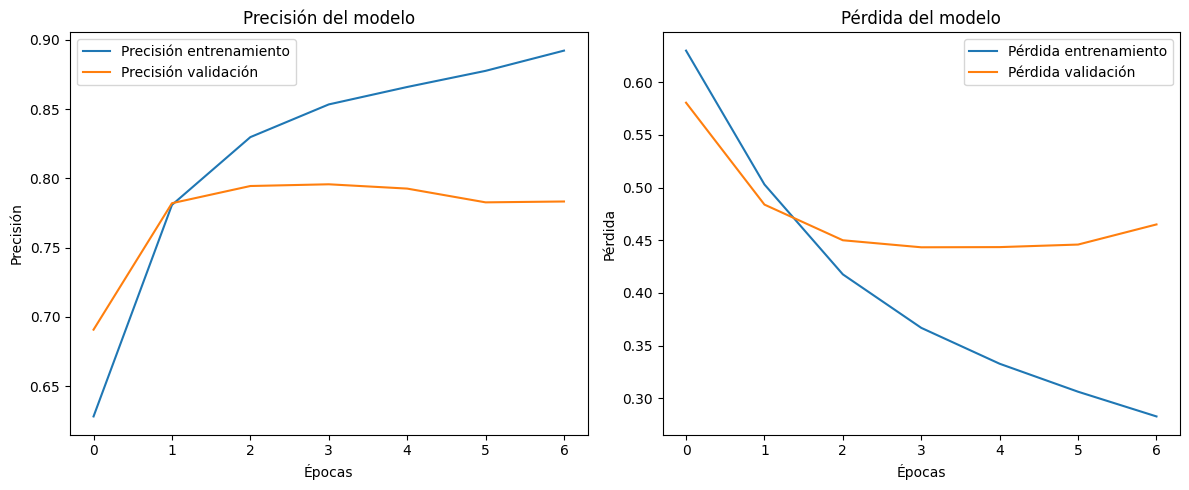

In [ ]:
import matplotlib.pyplot as plt

# Precisión
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


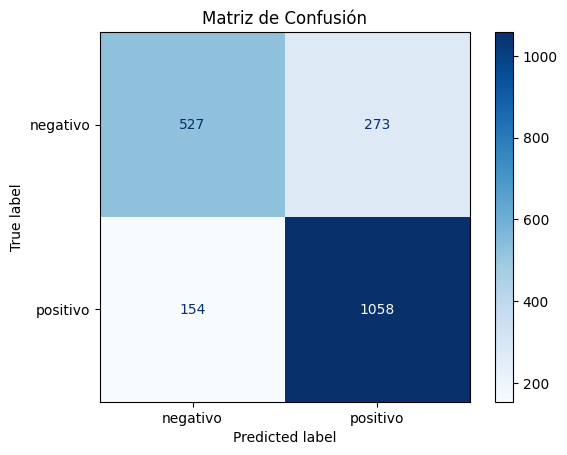

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predicciones
y_pred_prob = model.predict(X_test.toarray())
y_pred = np.argmax(y_pred_prob, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Reporte de Clasificación:

              precision    recall  f1-score   support

    negativo       0.76      0.67      0.71       800
    positivo       0.80      0.86      0.83      1212

    accuracy                           0.78      2012
   macro avg       0.78      0.77      0.77      2012
weighted avg       0.78      0.78      0.78      2012



Se implementó una red neuronal simple con una capa de 12 neuronas. Además, se implementó early stopping para prevenir el sobreajuste, deteniendo el entrenamiento cuando la pérdida de validación dejó de mejorar.

En base a los datos se puede concluir que:

El modelo tiene mejor desempeño al predecir sentimientos positivos. Sin embargo, 273 sentimientos negativos fueron mal clasificados como positivos, lo que indica una posible tendencia del modelo a sesgarse hacia lo positivo.

Como mejora futura se podría realizar un balance de clases o utilizar otras tecnicas para aumentar el rendimiento en la clasificación de reseñas negativas.
